/var/folders/7y/w1x66jnn5xd0kr0cysch23d00000gn/T/ipykernel_55737/2530069190.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, x = wavfile.read("week2_unknown_guitar_string.wav")  # Replace with the correct path if needed


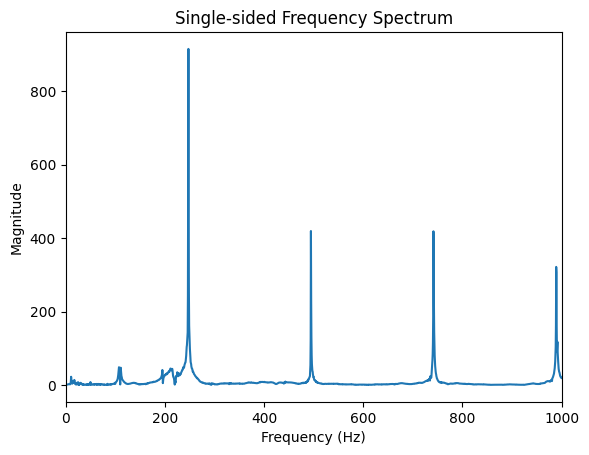

The open guitar string that was struck is B3.


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Read in audio file
fs, x = wavfile.read("week2_unknown_guitar_string.wav")  # Replace with the correct path if needed

# Compute the single-sided frequency spectrum
N = len(x)  # Length of audio data
X = np.fft.fft(x) / N  # Compute Fourier transform and normalize
f = np.fft.fftfreq(N, 1/fs)  # Frequency range
f_single = f[:N//2]  # Single-sided frequency range
X_single = 2 * np.abs(X[:N//2])  # Single-sided spectrum

# Plot the single-sided frequency spectrum
plt.figure()
plt.plot(f_single, X_single)
plt.xlim([0, 1000])  # Limit plot to 0–1kHz range
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Single-sided Frequency Spectrum')
plt.show()

# Find frequency of guitar string
max_index = np.argmax(X_single)
f_string = f_single[max_index]  # Estimated frequency of guitar string

# Determine which string was struck
string_names = ['E2', 'A2', 'D3', 'G3', 'B3', 'E4']  # String names
expected_freqs = [82.41, 110, 146.83, 196, 246.94, 329.63]  # Expected frequencies
string_index = np.argmin(np.abs(f_string - np.array(expected_freqs)))  # Compare estimated freq to expected freqs
string_name = string_names[string_index]  # Name of string that was struck

print(f'The open guitar string that was struck is {string_name}.')

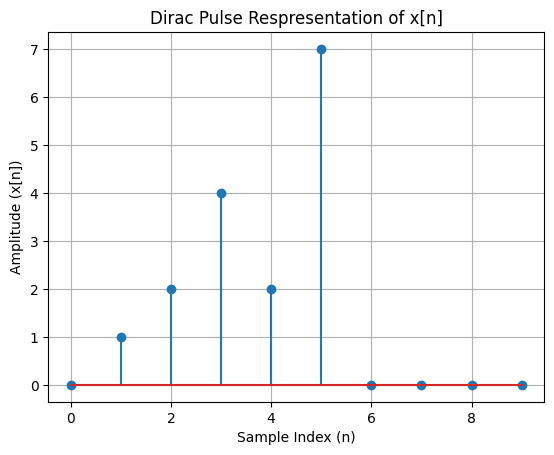

In [10]:
#Question 7 
import numpy as np
import matplotlib.pyplot as plt

#Define the sequence
x_n = [0,1,2,4,2,7,0,0,0,0]
n = np.arange(len(x_n)) # Sample indices

# Plot the Sequence as Dirac Pulses
plt.figure()
plt.stem(n, x_n)
plt.xlabel('Sample Index (n)')
plt.ylabel('Amplitude (x[n])')
plt.title('Dirac Pulse Respresentation of x[n]')
plt.grid(True)
plt.show()



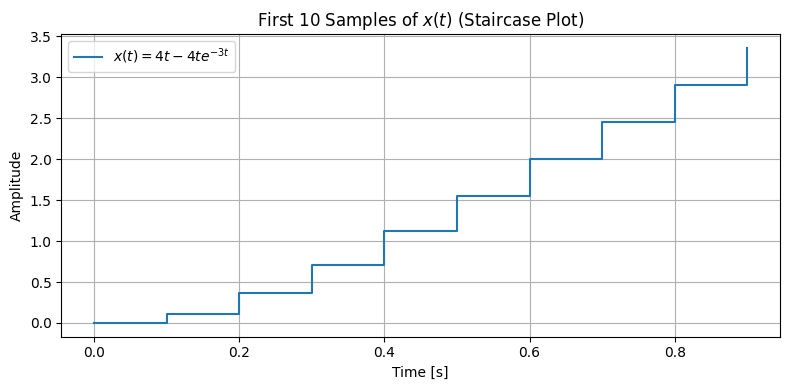

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Function definition
def x(t):
    return 4 * t - 4 * t * np.exp(-3 * t)

# Sampling parameters
Ts = 0.1
n = np.arange(10)
t_samples = n * Ts
x_samples = x(t_samples)

# Staircase plot
plt.figure(figsize=(8, 4))
plt.step(t_samples, x_samples, where='post', label='$x(t) = 4t - 4t e^{-3t}$')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('First 10 Samples of $x(t)$ (Staircase Plot)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
# Question 9 a.

import sympy as sp


#Define Variables 
n, z = sp.symbols('n z')
x_n = 3 * sp.sin(4*n) + 4 * sp.cos(4*n)

# Compute the Z-transform
X_z = sp.summation(x_n * z**(-n),  (n, 0, sp.oo)) # Z transform formula

# Simplify the result
X_z_simplified = sp.simplify(X_z)

# Pretty print the result
print("Z-transform of x[n]:")
print(sp.pretty(X_z_simplified, use_unicode=True))

Z-transform of x[n]:
  ∞                                
 ___                               
 ╲                                 
  ╲    -n                          
  ╱   z  ⋅(3⋅sin(4⋅n) + 4⋅cos(4⋅n))
 ╱                                 
 ‾‾‾                               
n = 0                              


In [26]:
#Question 9 b.
import sympy as sp

k, z = sp.symbols('k z')
x_k = 0.75**k

# Summation definition
X_z_sum = sp.summation(x_k * z**(-k), (k, 0, sp.oo))

# Closed-form solution for geometric series
X_z_closed = z / (z - 0.75)

print("Z-transform of x_k = 0.75^k:")
print()
print("Summation definition:")
print(sp.pretty(sp.Eq(sp.Symbol('X(z)'), sp.Sum(0.75**k * z**(-k), (k, 0, sp.oo))), use_unicode=True))
print()
print("Closed-form solution:")
print(sp.pretty(sp.Eq(sp.Symbol('X(z)'), X_z_closed), use_unicode=True))


Z-transform of x_k = 0.75^k:

Summation definition:
         ∞            
        ___           
        ╲             
         ╲       k  -k
X(z) =   ╱   0.75 ⋅z  
        ╱             
        ‾‾‾           
       k = 0          

Closed-form solution:
          z    
X(z) = ────────
       z - 0.75


In [29]:
# Question 9 c.
import sympy as sp

k, z = sp.symbols('k z')
x_k = 5*k * 5**k

# Summation definition
X_z_sum = sp.summation(x_k * z**(-k), (k, 0, sp.oo))

# Closed-form solution for the Z-transform of k * a^k
X_z_closed = 5 * z / (z - 5)**2

print("Z-transform of x_k = k * 5^k:")
print()
print("Summation definition:")
print(sp.pretty(sp.Eq(sp.Symbol('X(z)'), sp.Sum(k * 5**k * z**(-k), (k, 0, sp.oo))), use_unicode=True))
print()
print("Closed-form solution:")
print(sp.pretty(sp.Eq(sp.Symbol('X(z)'), X_z_closed), use_unicode=True))

Z-transform of x_k = k * 5^k:

Summation definition:
         ∞           
        ___          
        ╲            
         ╲    k    -k
X(z) =   ╱   5 ⋅k⋅z  
        ╱            
        ‾‾‾          
       k = 0         

Closed-form solution:
         5⋅z   
X(z) = ────────
              2
       (z - 5) 


In [2]:
# Question 6: Partial fraction expansion of (2s + 1)/(s(s+1)(s+2))
import sympy as sp

s = sp.symbols('s')
H = (2*s + 1) / (s * (s + 1) * (s + 2))

# Expand into partial fractions
H_partial = sp.apart(H)

print("Partial fraction expansion of (2s + 1)/(s(s+1)(s+2)):")
print(sp.pretty(H_partial, use_unicode=True))



Partial fraction expansion of (2s + 1)/(s(s+1)(s+2)):
      3         1      1 
- ───────── + ───── + ───
  2⋅(s + 2)   s + 1   2⋅s
